# Analisis Dataset Sleep Health and Lifestyle

In [78]:
import pandas as pd

df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


### 1. Rata-rata, standar deviasi, nilai minimum, nilai maksimum, Q1, Q2, dan Q3 dari attribute bertipe angka.

In [79]:
# pilih atribut bertipe angka (int/float)
numeric_df = df.select_dtypes(include=['int64','float64'])

# buat dataframe
summary = pd.DataFrame({
    "Rata-rata": numeric_df.mean(),
    "Standar Deviasi": numeric_df.std(),
    "Min": numeric_df.min(),
    "Max": numeric_df.max(),
    "Q1": numeric_df.quantile(0.25),
    "Q2 (Median)": numeric_df.quantile(0.5),
    "Q3": numeric_df.quantile(0.75)
})

# tampilkan tabel
summary

,Rata-rata,Standar Deviasi,Min,Max,Q1,Q2 (Median),Q3
Person ID,187.500000,108.108742,1.0,374.0,94.25,187.5,280.75
Age,42.184492,8.673133,27.0,59.0,35.25,43.0,50.00
Sleep Duration,7.132086,0.795657,5.8,8.5,6.40,7.2,7.80
Quality of Sleep,7.312834,1.196956,4.0,9.0,6.00,7.0,8.00
Physical Activity Level,59.171123,20.830804,30.0,90.0,45.00,60.0,75.00
Stress Level,5.385027,1.774526,3.0,8.0,4.00,5.0,7.00
Heart Rate,70.165775,4.135676,65.0,86.0,68.00,70.0,72.00
Daily Steps,6816.844920,1617.915679,3000.0,10000.0,5600.00,7000.0,8000.00


### 2. 10 record pertama dari dataset dengan attribute bertipe angka.

In [80]:
numeric_df.head(10)

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
0,1,27,6.1,6,42,6,77,4200
1,2,28,6.2,6,60,8,75,10000
2,3,28,6.2,6,60,8,75,10000
3,4,28,5.9,4,30,8,85,3000
4,5,28,5.9,4,30,8,85,3000
5,6,28,5.9,4,30,8,85,3000
6,7,29,6.3,6,40,7,82,3500
7,8,29,7.8,7,75,6,70,8000
8,9,29,7.8,7,75,6,70,8000
9,10,29,7.8,7,75,6,70,8000


### 3. Informasi jumlah record, jumlah attribute, nama attribute, jumlah attribute dengan tipe angka.

In [81]:
print("Jumlah record:", df.shape[0])
print("Jumlah atribut:", df.shape[1])
print("Nama atribut:", df.columns.tolist())
print("Jumlah atribut angka:", len(numeric_df.columns))

Jumlah record: 374
Jumlah atribut: 13
Nama atribut: ['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']
Jumlah atribut angka: 8


### 4. Jumlah label dari semua attribute yang bernilai object

In [82]:
object_df = df.select_dtypes(include=['object'])

for col in object_df.columns:
    print(f"\n{col} : {df[col].nunique()} label")
    print(df[col].value_counts())


Gender : 2 label
Gender
Male      189
Female    185
Name: count, dtype: int64

Occupation : 11 label
Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

BMI Category : 4 label
BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

Blood Pressure : 25 label
Blood Pressure
130/85    99
140/95    65
125/80    65
120/80    45
115/75    32
135/90    27
140/90     4
125/82     4
132/87     3
128/85     3
126/83     2
115/78     2
139/91     2
142/92     2
119/77     2
135/88     2
129/84     2
128/84     2
131/86     2
117/76     2
130/86     2
118/75     2
121/79     1
122/80     1
118/76     1
Name: count, dtype: int64

Sleep Disorder : 2 labe

### 5. Boxplot

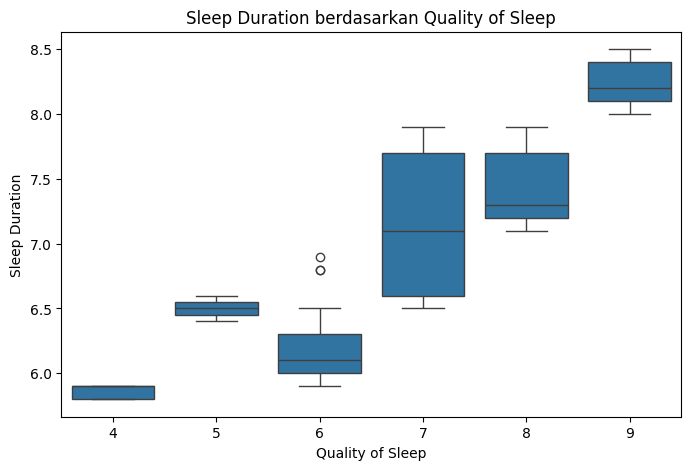

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x="Quality of Sleep", y="Sleep Duration", data=df)
plt.title("Sleep Duration berdasarkan Quality of Sleep")
plt.show()

### 6. Korelasi dataset dengan heatmap

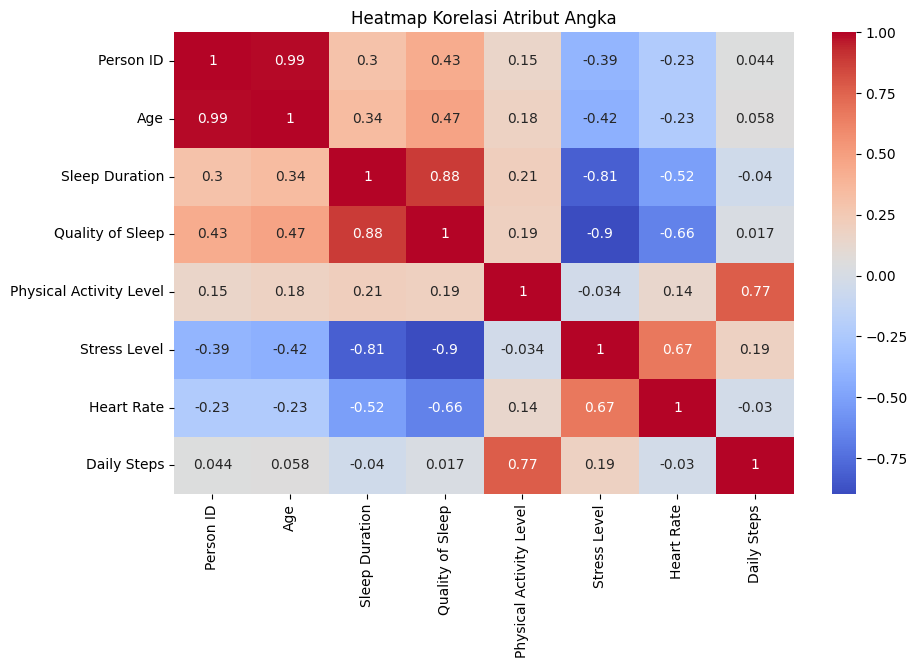

In [84]:
plt.figure(figsize=(10,6))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi Atribut Angka")
plt.show()

## Kesimpulan Analisis Dataset Sleep Health and Lifestyle

1. **Statistik deskriptif**  
   - Rata-rata durasi tidur adalah sekitar **7.1 jam** dengan standar deviasi **0.79**, menunjukkan variasi durasi tidur tidak terlalu besar.  
   - Rata-rata kualitas tidur adalah **7.3**, dengan median 7, menunjukkan mayoritas responden memiliki kualitas tidur cukup baik.  
   - Tingkat aktivitas fisik rata-rata **59**, sedangkan tingkat stres rata-rata **5.3**.  

2. **10 data awal**  
   - Menunjukkan variasi umur, durasi tidur, kualitas tidur, tingkat aktivitas fisik, tingkat stress, detak jantung, dan langkah harian.

3. **Struktur dataset**  
   - Terdapat **374 record** dan **13 atribut**.  
   - Dari jumlah tersebut, **8 atribut numerik** dan sisanya bertipe kategori.  

4. **Atribut kategori**  
   - **Gender** terdiri dari 2 label (Male, Female) dengan jumlah hampir seimbang.  
   - **Occupation** memiliki 11 label dengan profesi paling banyak seperti *Nurse*, *Doctor*, dan *Engineer*.  
   - **BMI Category** terdiri dari 4 label dengan dominasi *Normal* dan *Overweight*.  
   - **Sleep Disorder** memiliki 2 label utama: *Sleep Apnea* dan *Insomnia*.  

5. **Visualisasi dengan Boxplot**  
   - Durasi tidur berhubungan positif dengan kualitas tidur. Semakin tinggi kualitas tidur, rata-rata durasi tidur juga semakin panjang.  

6. **Heatmap**  
   - Korelasi kuat terlihat antara **Physical Activity Level** dengan **Daily Steps**.  
   - **Stress Level** cenderung berkorelasi negatif dengan **Quality of Sleep**, artinya semakin tinggi stres maka kualitas tidur menurun.  
   - Atribut lain seperti *Heart Rate* dan *Blood Pressure* menunjukkan hubungan yang lebih lemah terhadap kualitas tidur.  

### Kesimpulan Utama
Kualitas tidur dalam dataset ini dipengaruhi oleh beberapa faktor penting:  
- **Durasi tidur** -> semakin lama durasi tidur, semakin baik kualitasnya.  
- **Tingkat stres** -> semakin tinggi stres, kualitas tidur menurun.  
- **Aktivitas fisik** -> berhubungan dengan kesehatan tubuh dan mendukung kualitas tidur yang lebih baik.  